In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from engine import RecommendationEngine
from auxiliary import write_file
import numpy as np

#np.linalg.svd()

In [2]:
r = RecommendationEngine(R=2, learning_rate=0.001)
m = np.random.default_rng().integers(0, 5, size=(10, 10), dtype=np.int8)
write_file(["Test Sample", m], new=True)
losses = r.train(m)
print(r.matrix_1.dot(r.matrix_2).round())
print(m)

Loss: 3.8246067423422496
Loss: 3.1683565694446467
Loss: 2.681323339954073
Loss: 2.312976022546781
Loss: 2.029814126202254
Loss: 1.809011679605206
Loss: 1.6346465667512093
Loss: 1.4953841299464332
Loss: 1.383010514964122
Loss: 1.2914791998111799
Loss: 1.2162765550782935
Loss: 1.1539908801226604
Loss: 1.102014207243945
Loss: 1.0583325252341005
Loss: 1.021375981731974
Loss: 0.9899104559239575
Loss: 0.9629581023888366
Loss: 0.9397384658580948
Loss: 0.919624388690257
Loss: 0.902108680537447
Loss: 0.8867787023295834
Loss: 0.8732968282516131
Loss: 0.8613853135393115
Loss: 0.8508144928301744
Loss: 0.8413935161965291
Loss: 0.8329630330087224
Loss: 0.8253893811660483
Loss: 0.8185599472176515
Loss: 0.8123794426905131
Loss: 0.8067669013818703
Loss: 0.801653246986974
Loss: 0.7969793141571598
Loss: 0.7926942317468278
Loss: 0.7887540966611097
Loss: 0.785120881856016
Loss: 0.7817615337716332
Loss: 0.7786472236131963
Loss: 0.7757527240441234
Loss: 0.7730558884771627
Loss: 0.7705372145906597
Loss: 0.768

In [5]:
np.array([1, 2]) @ np.array([[3], [4]])

array([11])

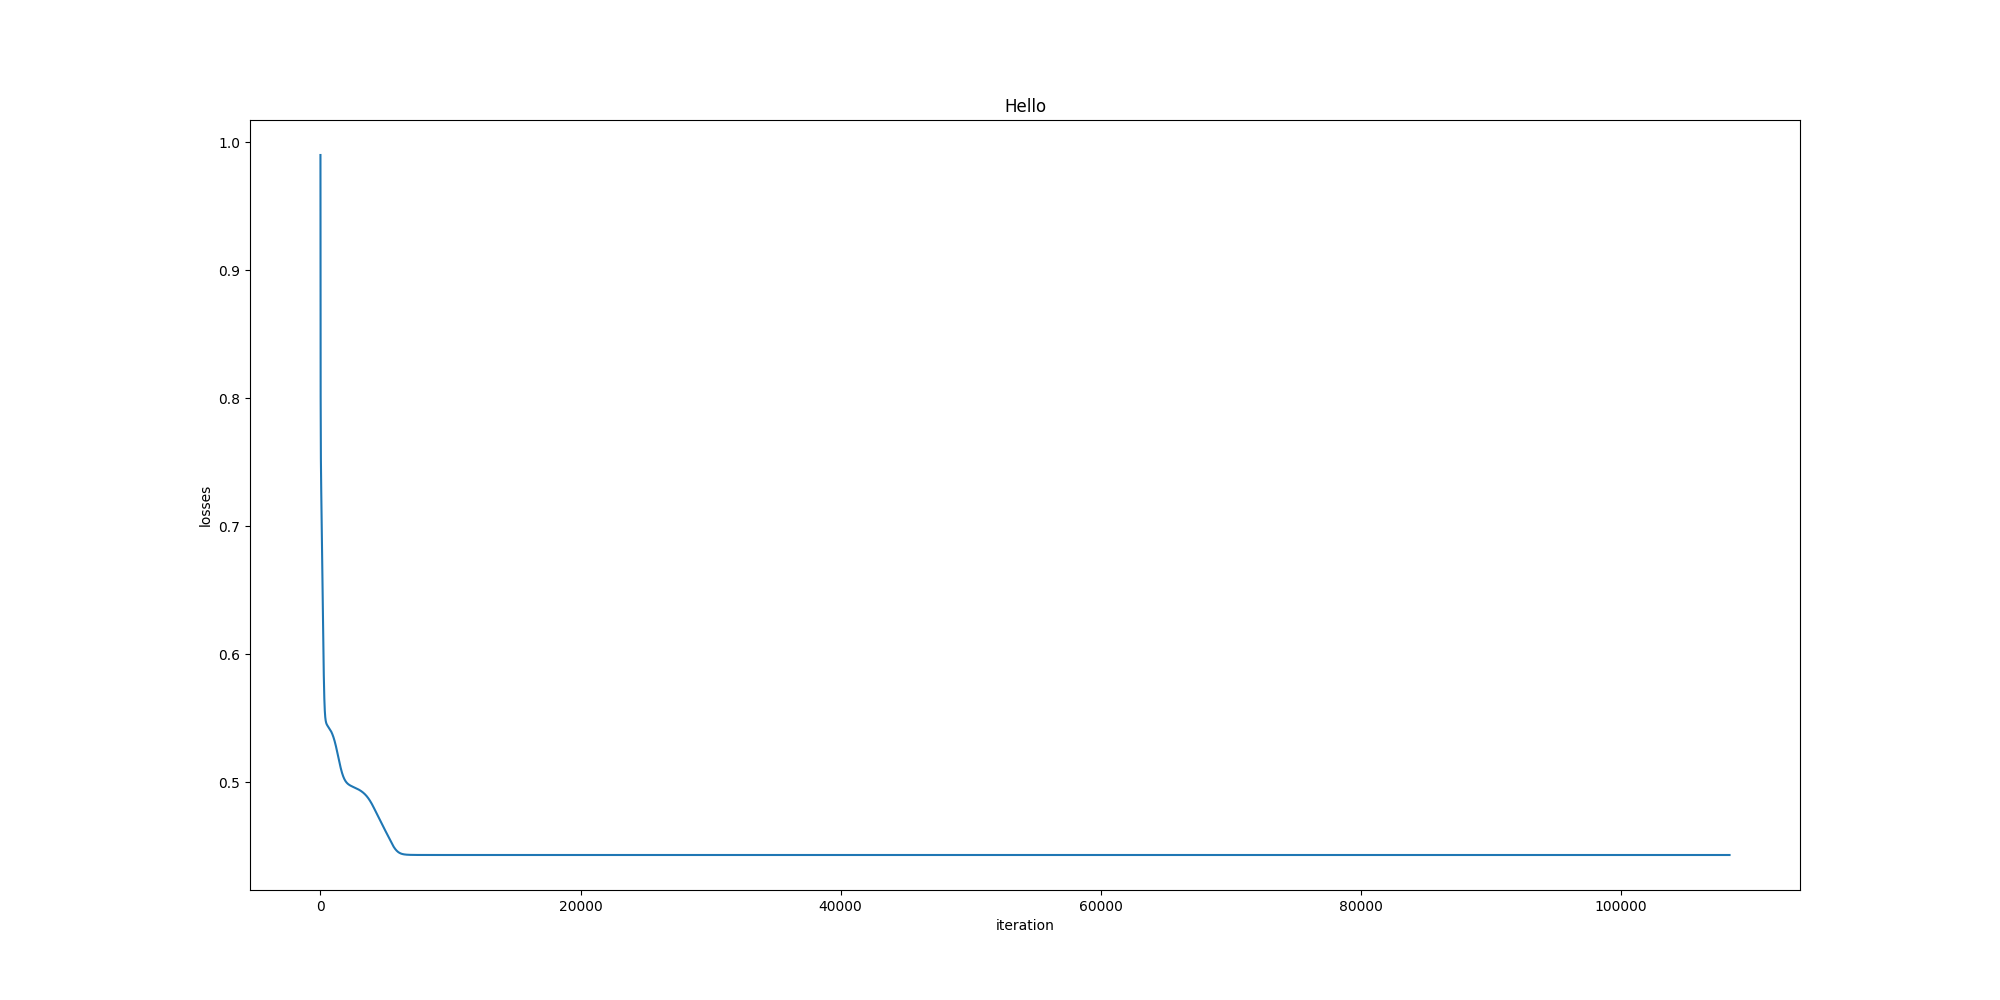

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(losses)

plt.title("Hello");
plt.ylabel("losses");
plt.xlabel("iteration");


In [34]:
x = [[5, 3, 4], [0, 3, 2], [1, 5, 3], [2, 3, 1]]
u,s,v = np.linalg.svd(x, full_matrices=False)

In [35]:
u

array([[-0.66868406,  0.69792066,  0.25544652],
       [-0.32144082, -0.46074098,  0.3507896 ],
       [-0.56482131, -0.54769585,  0.07233909],
       [-0.36126765, -0.02556877, -0.89803162]])

In [36]:
s

array([9.88067669, 3.58085177, 1.24488098])

In [37]:
v

array([[-0.46867002, -0.69613493, -0.54382403],
       [ 0.80728555, -0.58747099,  0.05628391],
       [-0.35866204, -0.4126427 ,  0.8373097 ]])

In [38]:
np.dot(u*s, v)

array([[ 5.0000000e+00,  3.0000000e+00,  4.0000000e+00],
       [-6.9388939e-16,  3.0000000e+00,  2.0000000e+00],
       [ 1.0000000e+00,  5.0000000e+00,  3.0000000e+00],
       [ 2.0000000e+00,  3.0000000e+00,  1.0000000e+00]])

In [39]:
a = np.array([1, 1])
b = np.array([[2, 2, 2, 2], [3, 3, 3, 3]])

In [40]:
a

array([1, 1])

In [41]:
b

array([[2, 2, 2, 2],
       [3, 3, 3, 3]])

In [42]:
np.dot(a, b)

array([5, 5, 5, 5])

In [1]:
from database import RecommenderDatabase

In [2]:
db = RecommenderDatabase()

In [3]:
db.create_database()

In [4]:
db.insert_into_table([[1, 2], [3, 5]], table='product_features')

['feature_1,feature_2', '?,?']
INSERT INTO product_features (feature_1,feature_2) VALUES (?,?) [1, 2]
INSERT INTO product_features (feature_1,feature_2) VALUES (?,?) [3, 5]


True

In [22]:
db.update_database([[2, 1, 0, 0], [5, 1, 0, 0]])

(2, 1, 0, 0, 1) UPDATE user_features SET feature_1 = ?,feature_2 = ?,feature_3 = ?,feature_4 = ? where rowid = ?
(5, 1, 0, 0, 2) UPDATE user_features SET feature_1 = ?,feature_2 = ?,feature_3 = ?,feature_4 = ? where rowid = ?


True

In [17]:
db.get_user_feature(1), db.get_features_count()

([(1.0, 1.0, None, None)], 4)

In [13]:
db.make_features(4)

In [7]:
import sqlite3

In [8]:
conn = sqlite3.connect(str(db.database_path/db.database_name))

In [25]:
cur = conn.cursor()
print(cur.execute("SELECT * FROM user_features").fetchall())

[(2.0, 1.0, 0.0, 0.0), (5.0, 1.0, 0.0, 0.0)]


In [11]:
cur.execute("UPDATE user_features SET feature_1 = ?, feature_2 = ? where rowid = ?", (4, 5, 1))
conn.commit()

In [24]:
db.update_database([1, 2, 3, 4],[1, 2, 3, 4], [1, 2, 3, 4])